## **APPROACH 4**
In the previous approach we did not achieve good accuracy because of the imbalance in the dataset.
 
•   Using the pre-processed EDA file created in FILE1-EDA.
 
•   We noticed that raw data(pre-processed) was highly imbalanced, due to which we did not find good results on the model built on them.
 
upsampling the data to see how the model performs.

upsampling using SMOTE
 
•   Splitting the dataset into train and test set
 
**MODEL BUILDING:**
 
•   **Model 1**:
Building the model on simple Neural Network, we noticed the model was overfitting.
 
•   **Model 2:**
  LSTM without pre-trained GloVe embeddings.
 
**• Model 3:**
  LSTM with pre-trained GloVe embeddings.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#setting project path
import os
os.chdir('/content/drive/My Drive')

In [0]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, Flatten
from keras.layers import GRU, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import  EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
import keras
from keras import backend as K
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
import os
from sklearn.metrics import roc_auc_score
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
df=pd.read_csv('eda.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
 
 
warnings.filterwarnings("ignore")
 
MAX_NB_WORDS = 18000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 769
# This is fixed.
EMBEDDING_DIM =200
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ')
tokenizer.fit_on_texts(df['nndes'].values)
 
X =tokenizer.texts_to_sequences(df['nndes'])
 
X = pad_sequences(X,padding='post',)
 
#Encoding the target column with the label Encoder
le = LabelEncoder() 
Y= pd.DataFrame(le.fit_transform(df['Assignment group']))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#Split actual test train data ( Raw Data)

In [0]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [0]:
#Upsampling data With the SMOTE function
#Upsampling on the Train data not the test data
sm = SMOTE(random_state = 42) 
   
X_res, y_res = sm.fit_resample(X_train_, y_train_) 
   
X_res = pd.DataFrame(X_res) 
y_res = pd.DataFrame(y_res) 

Here we are spliting the actaul raw data in to the Train and test. 
Post splitting will upsample on the train data no the test data.
Will train the model with the upsampled train data and 
test the models with the actual raw test data

X_res and y_res is our upsampled train data and 

X_test_ and y_test_ are out test data

In [0]:
print("Shape of X train ",X_res.shape)
print("Shape of y train ",y_res.shape)

Shape of X train  (135030, 769)
Shape of y train  (135030, 1)


In [0]:
print("Shape of X test ",X_test_.shape)
print("Shape of y test ",y_test_.shape)

Shape of X test  (1700, 769)
Shape of y test  (1700, 1)


In [0]:
X_res.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768
0,131,13,26,72,1245,29,13,13,13,13,457,13,159,7,7,11,3,410,908,6498,295,175,7,20,16,652,11,3,72,13,26,6,51,131,38,92,6,39,399,47,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,31,54,300,52,40,2095,31,22,52,40,31,63,54,34,31,32,3,190,63,54,193,101,22,4,4,65,10,98,32,4,9,105,4,51,105,15,10,98,34,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,13,21,108,12747,12748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,7061,149,549,2,36,3,108,549,12,7,7061,1991,12093,710,124,56,404,17,38,83,12094,12095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1424,1107,418,81,397,12,19,245,252,81,397,12,19,245,252,7693,7694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_res_onehot=pd.DataFrame(pd.get_dummies(y_res[0]).values)

In [0]:
y_res_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
135026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
135027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
135028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
y_test_onehot=pd.DataFrame(pd.get_dummies(y_test_[0]).values)

In [0]:
y_test_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1696,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1698,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **SIMPLE NEURAL NETWROK MODEL WITHOUT PRE TRAINED WEIGHTS**

In [0]:
#Model buliding
#Initialize variables

embedding_size=100
batch_size =100
epochs = 10
maxlen=769
model = Sequential() #Sequential model

model.add(Embedding(MAX_NB_WORDS, embedding_size, input_length=maxlen))  #Init embedding layer with no pretrained wts
#embedding layer takes input of vocabulary size i.e 13000, embedding dimension i.e 50 and input sequence i.e number of columns of dataset i.e 300
model.add(Flatten()) #Use flatten layer
model.add(Dropout(0.5)) #use dropout for regularization
model.add(Dense(10)) #Hidden layer
model.add(Dropout(0.3)) #use dropout for regularization
model.add(Dense(42, activation='sigmoid')) #Output layer

In [0]:
#To see what our model have, number of layer , output shape ,etc
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 769, 100)          1800000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 76900)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 76900)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                769010    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                462       
Total params: 2,569,472
Trainable params: 2,569,472
Non-trainable params: 0
____________________________________________

In [0]:
#Compile model with optimizer adam, loss as binary cross entropy and metric is accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#Fitting model to xtrain and ytrain with defined epochs and batch size
history= model.fit(
  X_res,
  y_res_onehot,
  batch_size=64,
  epochs=15,
  validation_data=(X_test_,y_test_onehot))


Train on 135030 samples, validate on 1700 samples
Epoch 1/15
135030/135030 [==============================] - 13s 100us/step - loss: 2.4909 - accuracy: 0.3013 - val_loss: 2.4680 - val_accuracy: 0.3782
Epoch 2/15
135030/135030 [==============================] - 13s 99us/step - loss: 2.4060 - accuracy: 0.3238 - val_loss: 2.3754 - val_accuracy: 0.4171
Epoch 3/15
135030/135030 [==============================] - 13s 99us/step - loss: 2.3357 - accuracy: 0.3425 - val_loss: 2.4751 - val_accuracy: 0.3759
Epoch 4/15
135030/135030 [==============================] - 13s 98us/step - loss: 0.8243 - accuracy: 0.1449 - val_loss: 1.1921e-07 - val_accuracy: 0.4476
Epoch 5/15
135030/135030 [==============================] - 13s 99us/step - loss: 1.1921e-07 - accuracy: 0.0238 - val_loss: 1.1921e-07 - val_accuracy: 0.4476
Epoch 6/15
135030/135030 [==============================] - 13s 98us/step - loss: 1.1921e-07 - accuracy: 0.0238 - val_loss: 1.1921e-07 - val_accuracy: 0.4476
Epoch 7/15
135030/135030 [===

In [0]:
#Evaluate test set and then print accuracy
test = model.evaluate(X_test_,y_test_onehot)
print('Test accuracy: ', test[1])

1700/1700 [==============================] - 0s 49us/step
Test accuracy:  0.4476470649242401


In [0]:
#Evaluate train set and then print accuracy
train = model.evaluate(X_res, y_res_onehot)
print('Train accuracy: ',train[1])

135030/135030 [==============================] - 7s 51us/step
Train accuracy:  0.02380952425301075


In [0]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['NN'], 'train acc': train[1], 'test acc':test[1]},index={'1'})
results = results[['Method', 'train acc','test acc']]
results

,Method,train acc,test acc
1,NN,0.02381,0.447647


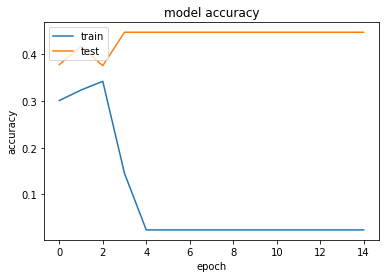

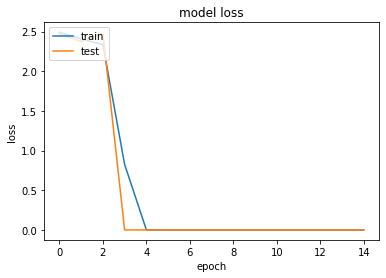

In [0]:
#visulaizing accuracies and loss for train and test set
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [0]:
# keras library import  for Saving and loading model and weights

from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("up_sample_nn.h5")

### **LSTM WITHOUT PRE TRAINED WEIGHTS**


In [0]:
#Model buliding
from keras.optimizers import Adam
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D,SpatialDropout1D

max_features=18000

model2 = Sequential()
model2.add(Embedding(max_features, 100,  input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(42, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['sparse_categorical_accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 769, 100)          1800000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 769, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 42)                4242      
Total params: 1,884,642
Trainable params: 1,884,642
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile model with optimizer adam, loss as binary cross entropy and metric is accuracy
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
#Define checkpoint, early stop and reduced lr
stop = EarlyStopping(monitor="val_loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode="min") 

In [0]:
#Fitting model to xtrain and ytrain with defined epochs and batch size
history2 = model2.fit(
  X_res,
  y_res_onehot,
  batch_size=100,
  epochs=5,
  validation_data=(X_test_,y_test_onehot),
  callbacks=[reduce_lr, stop],
  verbose=1
)


Train on 135030 samples, validate on 1700 samples
Epoch 1/5
135030/135030 [==============================] - 1939s 14ms/step - loss: 3.7385 - accuracy: 0.0233 - val_loss: 3.7566 - val_accuracy: 0.0247
Epoch 2/5
135030/135030 [==============================] - 1973s 15ms/step - loss: 3.7382 - accuracy: 0.0233 - val_loss: 3.7389 - val_accuracy: 0.0141
Epoch 3/5
135030/135030 [==============================] - 1948s 14ms/step - loss: 3.7382 - accuracy: 0.0232 - val_loss: 3.7493 - val_accuracy: 0.0059
Epoch 4/5
135030/135030 [==============================] - 1964s 15ms/step - loss: 3.7381 - accuracy: 0.0236 - val_loss: 3.7388 - val_accuracy: 0.0047
Epoch 5/5
135030/135030 [==============================] - 2040s 15ms/step - loss: 3.7382 - accuracy: 0.0233 - val_loss: 3.7302 - val_accuracy: 0.0059


In [0]:
#Evaluate test set and then print accuracy
test2 = model2.evaluate(X_test_,y_test_onehot)
print('Test accuracy: ', test2[1])

1700/1700 [==============================] - 6s 4ms/step
Test accuracy:  0.0058823530562222


In [0]:
#Evaluate train set and then print accuracy
train2 = model2.evaluate(X_res, y_res_onehot)
print('Train accuracy: ', train2[1])

135030/135030 [==============================] - 506s 4ms/step
Train accuracy:  0.02380952425301075


In [0]:
  X_train=X_res
  y_train=y_res_onehot
  X_test=X_test_ 
  y_test=y_test_onehot


In [0]:

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LSTM'], 'train acc': [train2[1]],'test acc':[test2[1]]},index={'2'})
results= pd.concat([results, tempResultsDf])
results = results[['Method', 'train acc','test acc']]
results

,Method,train acc,test acc
1,NN,0.02381,0.447647
2,LSTM,0.02381,0.005882


In [0]:
#for creating classification report
predicted = model2.predict(X_test)
predicted


array([[0.02432776, 0.02355874, 0.02385339, ..., 0.02325266, 0.0233066 ,
        0.02408345],
       [0.02432776, 0.02355874, 0.02385339, ..., 0.02325266, 0.0233066 ,
        0.02408345],
       [0.02432777, 0.02355874, 0.02385339, ..., 0.02325266, 0.0233066 ,
        0.02408345],
       ...,
       [0.02432776, 0.02355874, 0.02385339, ..., 0.02325266, 0.0233066 ,
        0.02408345],
       [0.02432776, 0.02355874, 0.02385339, ..., 0.02325266, 0.0233066 ,
        0.02408345],
       [0.02432776, 0.02355874, 0.02385339, ..., 0.02325266, 0.0233066 ,
        0.02408345]], dtype=float32)

### **LSTM WITH PRE TRAINED WEIGHTS**

In [0]:
os.getcwd()

'/content/drive/My Drive'

In [0]:
#loading the pre-trained glove vectors of dimension size 200
from numpy import array
from numpy import asarray
from numpy import zeros
max_features=18000

embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/glove.6B.200d.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
#creating a weight matrix
embedding_matrix = zeros((max_features, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
#model building

model3 = Sequential()  #Sequential model
model3.add(Embedding(max_features, 200, input_length=maxlen, weights=[embedding_matrix], trainable=True)) #Init embedding layer with no pretrained wts 
model3.add(Dropout(0.5)) #use dropout for regularization embedding_matrix
model3.add(LSTM(100,return_sequences=True, dropout=0.4))  #Hidden layer with dropout Here return_sequences=true as I want to get output from all layer than apply global max pool over all the output so that I dont miss out important info
model3.add(GlobalMaxPool1D()) #This is to get values from all states and not missing important info
model3.add(Dense(42, activation="sigmoid")) #Final dense layer 
#Note:GlobalMaxPool1D requires output from all lSTMs therfore return_sequences = True, this returns output from all LSTM not just final LSTM 
#ALso GlobalMaxPool1D takes max of all output in very special way this step is done so that every words wether at start or at he end is given importance. 


In [0]:
#Compile model with optimizer adam, loss as binary cross entropy and metric is accuracy
model3.compile(
  loss='categorical_crossentropy',
  #optimizer=Adam(lr=0.01),  #best
  optimizer='adam',
  metrics=['acc']
)

In [0]:
#Define checkpoint, early stop and reduced lr
stop = EarlyStopping(monitor="val_loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode="min") 

In [0]:
#Fitting model to xtrain and ytrain with defined epochs and batch size
#Here I have used requlaization and model performance tech such as reduced lr, check point and early stop

history3 = model3.fit(
  X_res,
  y_res_onehot,
  batch_size=64,
  epochs=5,
  validation_data=(X_test_,y_test_onehot),
  callbacks=[reduce_lr, stop],
  verbose=1
)

Train on 135030 samples, validate on 1700 samples
Epoch 1/5
135030/135030 [==============================] - 3878s 29ms/step - loss: 3.0765 - acc: 0.1641 - val_loss: 2.5614 - val_acc: 0.3406
Epoch 2/5
135030/135030 [==============================] - 3889s 29ms/step - loss: 2.6608 - acc: 0.2607 - val_loss: 2.3398 - val_acc: 0.3882
Epoch 3/5
135030/135030 [==============================] - 3911s 29ms/step - loss: 2.4680 - acc: 0.3114 - val_loss: 2.0935 - val_acc: 0.4612
Epoch 4/5
135030/135030 [==============================] - 3903s 29ms/step - loss: 2.3177 - acc: 0.3510 - val_loss: 2.0126 - val_acc: 0.4735
Epoch 5/5
135030/135030 [==============================] - 3900s 29ms/step - loss: 2.1935 - acc: 0.3823 - val_loss: 2.0359 - val_acc: 0.4735


In [0]:
#Evaluate test set and then print accuracy
test3 = model3.evaluate(X_test_, y_test_onehot)
print('Test accuracy: ', test3[1])

1700/1700 [==============================] - 10s 6ms/step
Test accuracy:  0.4735293984413147


In [0]:
#Evaluate train set and then print accuracy
train3 = model3.evaluate(X_res,y_res_onehot)
print('Train accuracy: ', train3[1])

135030/135030 [==============================] - 775s 6ms/step
Train accuracy:  0.43251869082450867


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
  font-size:30px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2> NN models peformance with Upsampled data</h2>

<table>
  <tr>
    <th>Method</th>
    <th>train acc</th>
    <th>test acc</th>
  </tr>
  <tr>
    <td>Simple NN</td>
    <td>0.02381</td>
    <td>0.447647</td>
  </tr>
  <tr>
    <td>LSTM</td>
    <td>0.02381	</td>
    <td>0.005882</td>
  </tr>
  <tr>
    <td> LSTM with pretrained weights</td>
    <td>0.43251</td>
    <td>0.4735</td>
  </tr>

</table>

</body>
</html>


On Upsampled Data We are seeing very low accuracies , So will try the NN modles with the downSampled data.

the model's performance is very poor on upsampled data, hence we will try downsampling in the next approach.